# App Rating Prediction

## To make a model to predict the app rating, with other information about the app provided

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("googleplaystore.csv")

In [3]:
data.shape

(10841, 13)

In [4]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Check for null values in the data. Get the number of null values for each column.

Drop records with nulls in any of the columns. 

Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

Extract the numeric value from the column

Multiply the value by 1,000, if size is mentioned in Mb

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

Installs field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

Price field is a string and has $ symbol. Remove ‘$’ sign

In [6]:
data.isnull().sum()  #checking for any null values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data1 = data.dropna()

In [8]:
data1.shape

(9360, 13)

In [9]:
data1.isnull().sum()  #so all the null values are dropped

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
data1["Size"]

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, Length: 9360, dtype: object

In [11]:
data1 = data1[-data1["Size"].str.contains("Var")] #removing the part of "Size" column where it contains "Var"

In [12]:
data1["Size"]

0         19M
1         14M
2        8.7M
3         25M
4        2.8M
         ... 
10833    619k
10834    2.6M
10836     53M
10837    3.6M
10840     19M
Name: Size, Length: 7723, dtype: object

In [13]:
data1.loc[:,"SizeNum"] = data1.Size.str.rstrip("Mk+")
#created a new column "SizeNum" with "Size" column values which doesnot has "M","k",or"+

In [14]:
data1["SizeNum"]

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10833    619
10834    2.6
10836     53
10837    3.6
10840     19
Name: SizeNum, Length: 7723, dtype: object

In [15]:
data1.SizeNum = pd.to_numeric(data1["SizeNum"])

In [16]:
data1["SizeNum"].dtype

dtype('float64')

In [17]:
import numpy as np

Multiply the value by 1,000, if size is mentioned in Mb

In [18]:
data1["SizeNum"] =np.where(data1["Size"].str.contains("M"),data1["SizeNum"]*1000,data1.SizeNum)

In [19]:
data1["SizeNum"]

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: SizeNum, Length: 7723, dtype: float64

In [20]:
data1.Size = data1.SizeNum                
data1.drop("SizeNum",axis=1,inplace=True)    
#replacing the values of "Size" column with "SizeNum" column and dropping the "SizeNum" column

Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float)

In [21]:
data1.Reviews = pd.to_numeric(data1.Reviews)

In [22]:
data1["Reviews"].dtype

dtype('int64')

"Installs" field is currently stored as string and has values like 1,000,000+. 

Treat 1,000,000+ as 1,000,000

remove ‘+’, ‘,’ from the field, convert it to integer

Price field is a string and has $ symbol.

Remove ‘$’ sign, and convert it to numeric.

In [23]:
data1["Installs"]=data1["Installs"].str.replace("+","")  #replacing "+" by ""  (blank)

<ipython-input-23-ca8095dd9749>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data1["Installs"]=data1["Installs"].str.replace("+","")  #replacing "+" by ""  (blank)


In [24]:
data1["Installs"]=data1["Installs"].str.replace(",","")   #replacing "," by ""  (blank)

In [25]:
data1["Installs"] = pd.to_numeric(data1.Installs)

In [26]:
data1["Installs"].dtype

dtype('int64')

In [27]:
data1["Installs"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

In [28]:
data1["Price"]=data1["Price"].str.replace("$","")   #replacing "$" by ""

<ipython-input-28-30317f0f4994>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data1["Price"]=data1["Price"].str.replace("$","")   #replacing "$" by ""


In [30]:
data1["Price"] = pd.to_numeric(data1.Price)

In [34]:
data1.Price.dtype

dtype('float64')

Sanity checks:

Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

For free apps (type = “Free”), the price should not be >0. Drop any such rows

In [35]:
data1 = data1[(data1.Rating>=1) & (data1.Rating<=5)]

In [37]:
data1["Rating"]

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7723, dtype: float64

In [38]:
len(data1.index)

7723

In [39]:
data1.drop(data1.index[data1.Reviews>data1.Installs],axis=0,inplace=True)

#dropping the records where "Reviews" are more than "Installs"

In [40]:
len(data1.index)

7717

In [41]:
import warnings
warnings.filterwarnings('ignore')

For free apps (type = “Free”), the price should not be >0. Drop any such rows

In [42]:
data1[(data1["Type"]=="Free") & (data1["Price"]>0)]

#checking if any "Free" apps with price greater than 0

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no such records

Performing univariate analysis: 

-BOXPLOT for "Price"

Are there any outliers? Think about the price of usual apps on Play Store.

-BOXPLOT for "Reviews"

Are there any apps with very high number of reviews? Do the values seem right?

-HISTOGRAM for "Rating"

How are the ratings distributed? Is it more toward higher ratings?

-HISTOGRAM for "Size"

Note down your observations for the plots made above. Which of these seem to have outliers?

 

<AxesSubplot:xlabel='Price'>

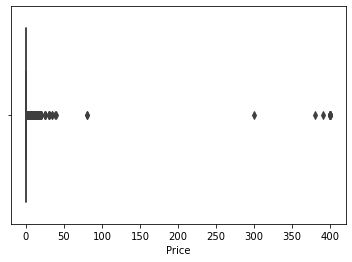

In [43]:
sns.boxplot(x="Price",data=data1)

There are only few with higher price, and most of the records falling under 100. So we can consider that, records with greater than 100 are the outliers.

In [44]:
std = np.std(data1.Price)  #standard deviation

In [45]:
mean =np.mean(data1.Price)   #mean

In [46]:
outlier_uplimit = mean + 3 *std

In [47]:
outlier_uplimit

53.36969138940857

So anything beyond 53.36 can be called upper outlier

In [48]:
len(data1[(data1["Price"]>outlier_uplimit)])

17

So, there are 17 outlier records

BOXPLOT for REVIEWS-
Installs-  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.

Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

<AxesSubplot:xlabel='Installs'>

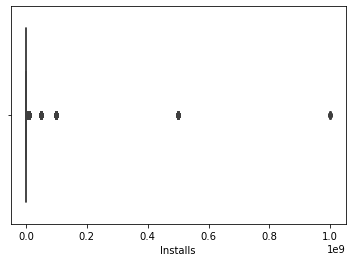

In [49]:
sns.boxplot(x="Installs",data=data1)

In [50]:
np.percentile(data1["Installs"],10)

1000.0

In [51]:
np.percentile(data1["Installs"],25)

10000.0

In [52]:
np.percentile(data1["Installs"],50)

100000.0

In [53]:
np.percentile(data1["Installs"],70)

1000000.0

In [54]:
np.percentile(data1["Installs"],90)

10000000.0

In [55]:
np.percentile(data1["Installs"],95)

50000000.0

In [56]:
np.percentile(data1["Installs"],99)

100000000.0

<AxesSubplot:xlabel='Installs', ylabel='Density'>

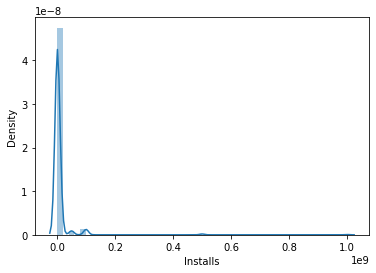

In [57]:
sns.distplot(data1["Installs"])

drop values > percentile of 99(almost 3rd stdev)

In [59]:
len(data1[data1.Installs>=100000000.0])
#checking again that how many values are greater than 3rd standard deviation

241

In [61]:
data1.drop(data1.index[data1.Installs>=100000000.0],inplace=True)
#dropping those values

Bivariate analysis- 
Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating.

Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

Make scatter plot/joinplot for Rating vs. Price

What pattern do you observe? Does rating increase with price?

Make scatter plot/joinplot for Rating vs. Size

Are heavier apps rated better?

Make scatter plot/joinplot for Rating vs. Reviews

Does more review mean a better rating always?

Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

Make boxplot for Ratings vs. Category

Which genre has the best ratings?

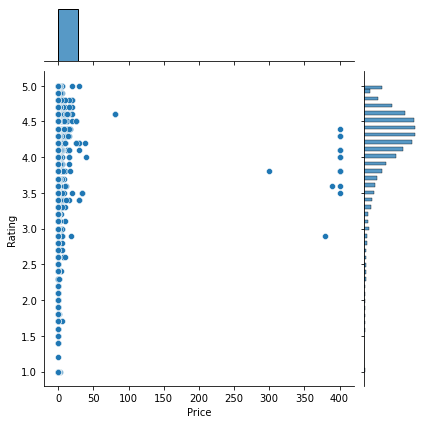

In [64]:
sns.jointplot(x="Price",y="Rating",data=data1)

By observing the plot, rating is not increasing with price which means
price has limited impact on rating.

Make scatter plot/joinplot for Rating vs. Size

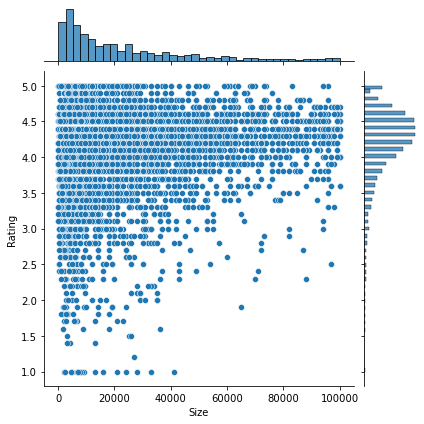

In [65]:
sns.jointplot(x="Size",y="Rating",data=data1)
#joint plot for SIZE and RATING

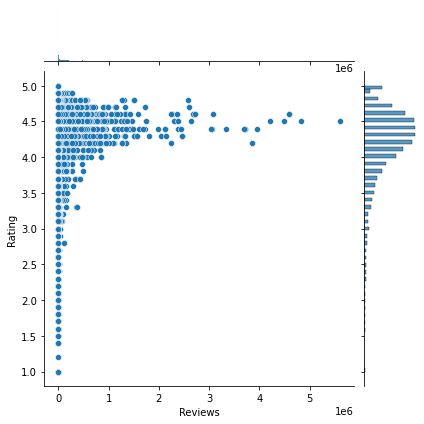

In [66]:
sns.jointplot(x="Reviews",y="Rating",data=data1)
#jointplot for REVIEWS and RATING

Does more review mean a better rating always?
No, because it showing a weak relation in the plot

In [67]:
data1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.116220,0.067926,0.090206,-0.020520
Reviews,0.116220,1.000000,0.217629,0.725131,-0.017533
Size,0.067926,0.217629,1.000000,0.199643,-0.024904
Installs,0.090206,0.725131,0.199643,1.000000,-0.023467
Price,-0.020520,-0.017533,-0.024904,-0.023467,1.000000


Make boxplot for Rating vs. Content Rating

Is there any difference in the ratings? Are some types liked better?

In [69]:
data1["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

<AxesSubplot:xlabel='Rating', ylabel='Content Rating'>

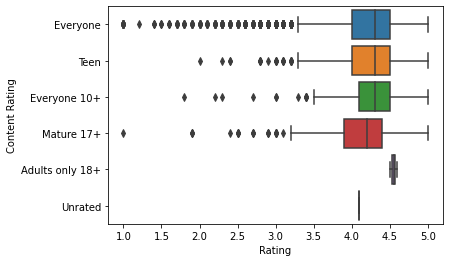

In [70]:
sns.boxplot(x="Rating",y="Content Rating",data=data1)

The maximum rating is for "Adult only 18+", the plot is smaller, but the rating is on higher side (around 4.5)

All the other content ratings seems to be similar.

<AxesSubplot:xlabel='Rating', ylabel='Category'>

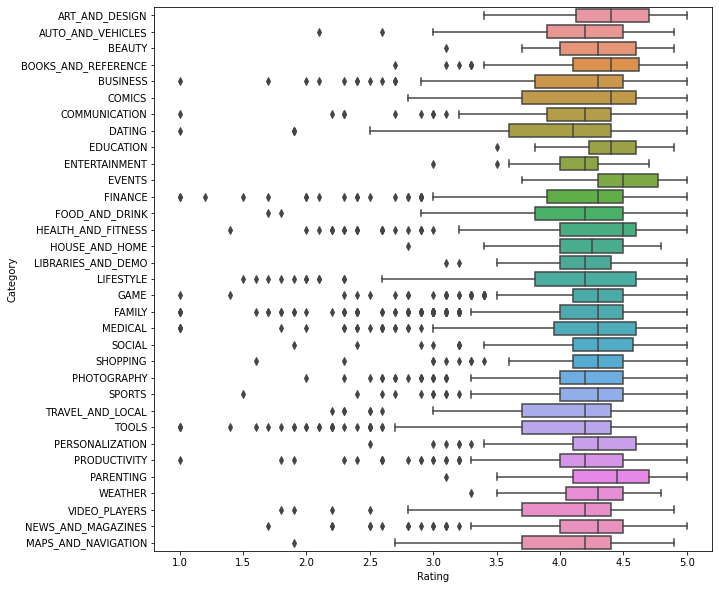

In [76]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Rating",y="Category",data=data1)

Reviews and Install have some values that are still relatively very high. 

Before building a linear regression model, you need to reduce the skew. 

Apply log transformation (np.log1p) to Reviews and Installs.

Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [77]:
inp1 = data1.copy()
#creating a copy of the dataframe to make all the edits and naming it "inp1".

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

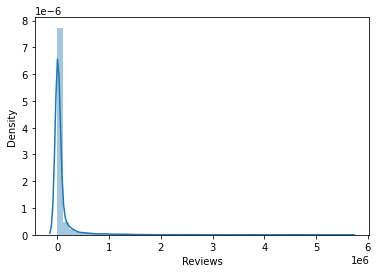

In [78]:
sns.distplot(inp1["Reviews"])

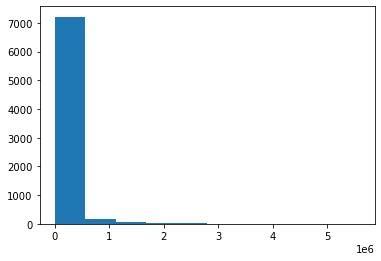

In [79]:
plt.hist(inp1[["Reviews"]])
plt.show()

In [81]:
inp1.Reviews=inp1.Reviews.apply(np.log1p)

#to remove the skewness in the data we are applying np.log1p (exponential smoothing)

In [82]:
inp1.Installs=inp1.Installs.apply(np.log1p)

In [83]:
inp1.drop(['App', 'Last Updated', 'Current Ver','Android Ver'],axis=1,inplace=True)

#dropping non useful columns i.e., App, Last Updated, Current Ver, and Android Ver

In [84]:
inp1.shape

(7476, 9)

In [89]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [90]:
inp1["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [91]:
inp2 = pd.get_dummies(inp1)

In [92]:
inp2.shape

(7476, 158)

Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

- Separate the dataframes into X_train, y_train, X_test, and y_test.

- Model building

Use linear regression as the technique

Report the R2 on the train set

- Make predictions on test set and report R2.

In [93]:
inp2.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,1.804211,19000.0,9.210440,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,2.063723,14000.0,13.122365,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,2.516043,8700.0,15.424949,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.5,2.586364,25000.0,17.727534,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,2.063723,2800.0,11.512935,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y = inp2.iloc[:,0]      #target

In [95]:
X = inp2.iloc[:,1:]     #features

In [96]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [98]:
lr.fit(x_train,y_train)

LinearRegression()

In [99]:
y_pred = lr.predict(x_test)

In [100]:
from sklearn.metrics import r2_score

In [102]:
r2_score(y_test,y_pred)

0.05728305956345847

Here the accuracy is very less and reason is we applied the "get_dummies" (as asked in the task),

and it highly increases the dimension

(for better accuracy, we can use "LabelEncoder" (Scikitlearn approach))

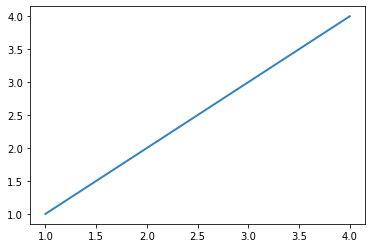

In [109]:
import matplotlib.pyplot as plt
x = [1,2,3,4]
y =x
plt.plot(x,y,linewidth=2,alpha=0.9)
plt.show()

In [ ]:
Successfully completed all the tasks

## by Ashish Roy